# <font color='Blue'>Gradient Boosting</font>

- It is a ensemble method so, we can use for both **Regression** and **Classification** problems.

- Gradient Boosting is used to improve the accuracy of predictions by combining multiple weak models (usually decision trees) into a strong model.

### <font color='magenta'>     </font>

### <font color='magenta'>     </font>

### <font color='magenta'>How it Works     </font>

**Start Simple**: Begin with a basic prediction (like predicting the average value).


**Identify Mistakes**: Look at the errors made by this initial model.


**Learn from Mistakes**: Train a new model specifically to fix these errors.


**Combine Models**: Add the predictions from this new model to the previous predictions.

**Repeat**: Continue this process multiple times, each time focusing on the errors of the combined model.

### <font color='magenta'>     </font>

### <font color='magenta'>     </font>

### <font color='magenta'>Key Parts     </font>

### <font color='magenta'>     </font>

 ##### <font color='red'> **Learning Rate**:-    </font>

The learning rate is a number that controls how much to change the model based on the error each time a tree is added.   



 *Why It Matters*

- If the learning rate is too high, the model might overshoot the best solution and perform poorly.
- If it’s too low, the model may take a very long time to converge (get to the best solution) or get stuck.
- Learning rates are often set in the range of 0.01 to 0.3.

*How to Find the Right Learning Rate*

**Start with Common Values**:

- A good starting point is around 0.1. This is a common default value.


  
**Test Different Values**:

Try a few different learning rates. You can pick values like 0.01, 0.05, 0.1, 0.2, 0.3, etc.


For each value, train your model and see how well it performs.

### <font color='magenta'>     </font>

##### <font color='red'> Number of Trees:    </font>

How many models you want to create. More trees can lead to better accuracy but also to overfitting (where the model learns too much from the training data and performs poorly on new data).

### <font color='magenta'>     </font>

### <font color='magenta'>     </font>

### <font color='magenta'>     </font>

### <font color='magenta'>     </font>

# <font color='magenta'>Gradient Boosting Regression     </font>

 Regression and classification problems are different in mathematical calculations.

We will see first Regression

### <font color='magenta'>     </font>

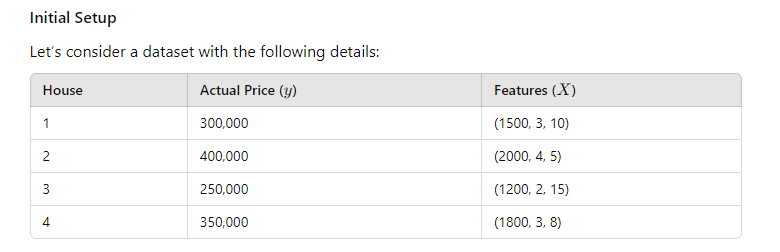

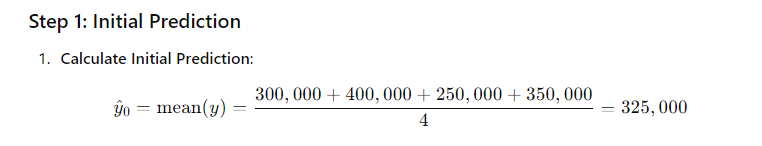

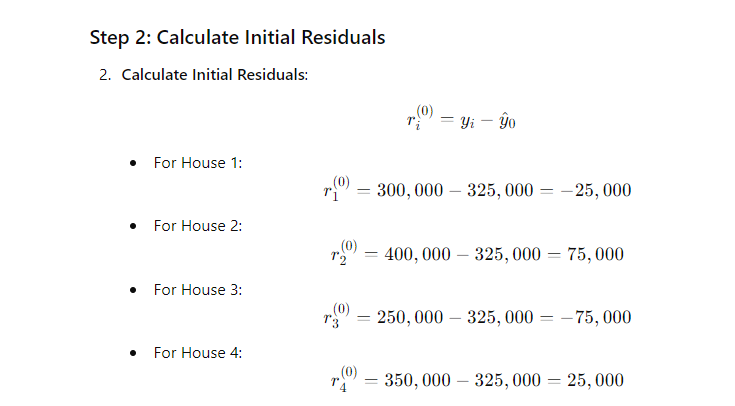

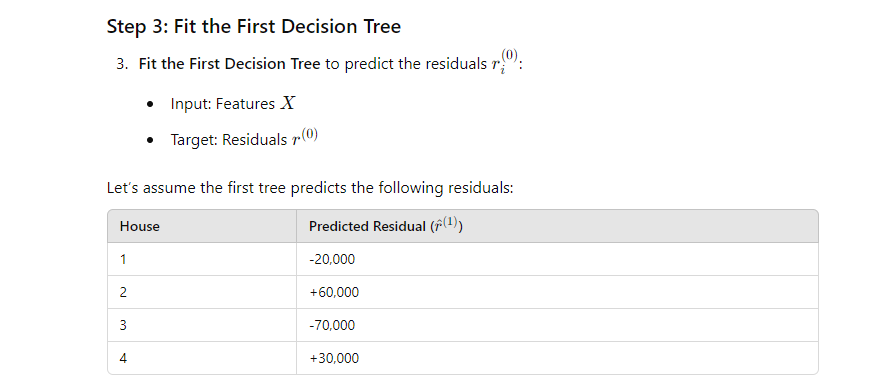

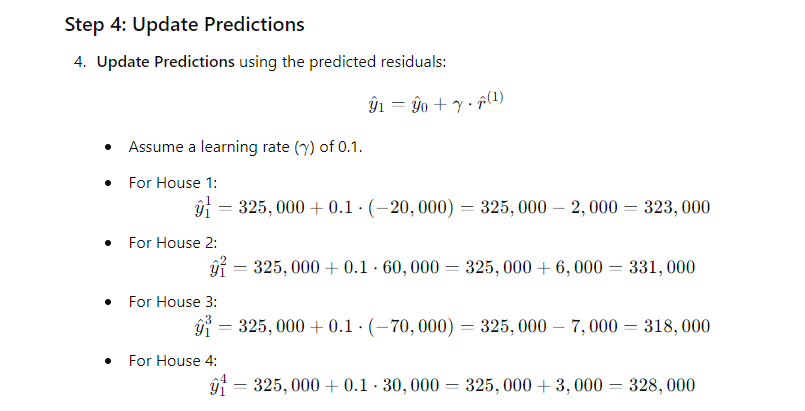

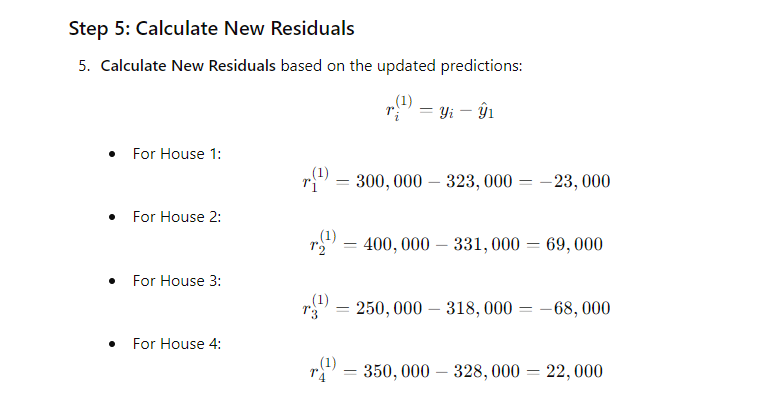

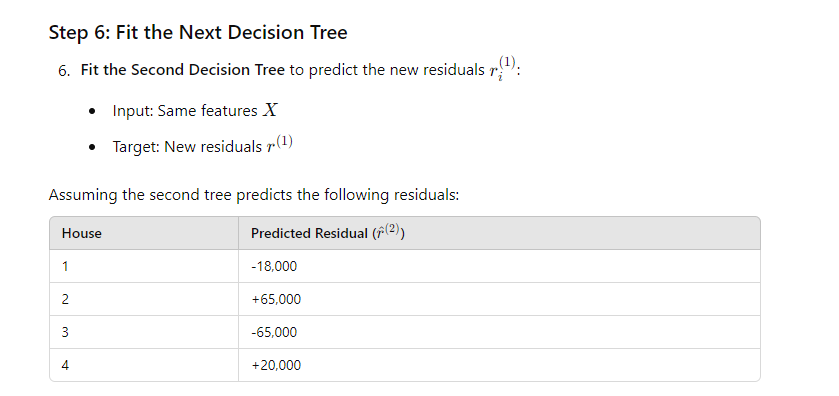

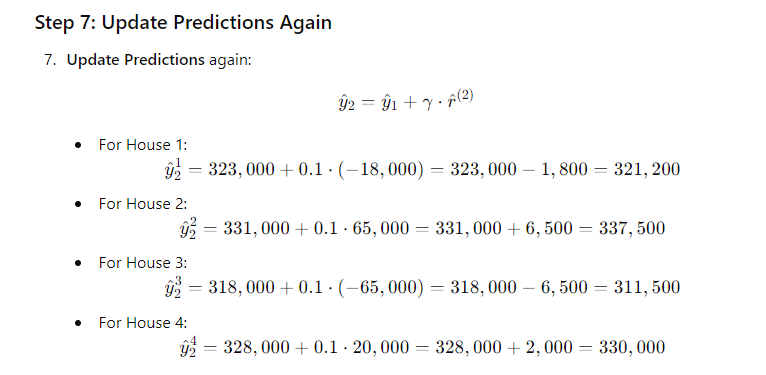

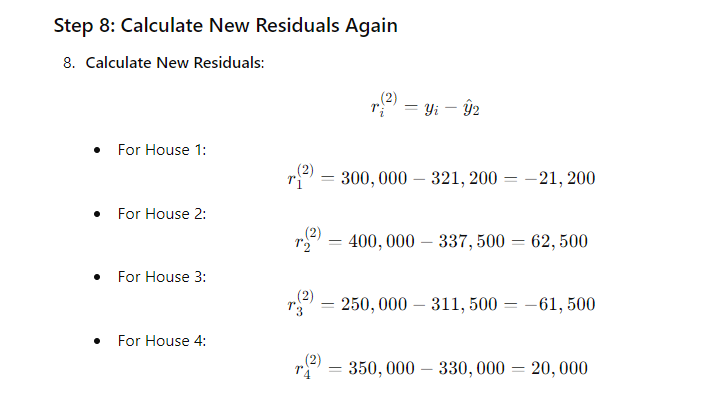

You would continue this process, fitting new decision trees to predict the latest residuals and updating your overall predictions.

Each iteration involves training the decision tree on the same input features 𝑋 but using the most recent residuals as the target variable.

This iterative correction improves the model’s accuracy over time, refining the predictions.

### <font color='magenta'>     </font>

### <font color='magenta'>     </font>

### <font color='magenta'>     </font>

# <font color='red'>Model Building</font>

### <font color='magenta'>     </font>

##### <font color='magenta'>1. Importing all Libraries     </font>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

##### <font color='magenta'>2. Load the California Housing Dataset  (In-Built)    </font>

In [5]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='price')

# Combine features and target for easier plotting
df = X.copy()
df['price'] = y

##### <font color='magenta'>3.EDA    </font>

In [6]:
print(X.head())
print(X.info())
print(X.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    

In [7]:
# Checking for null values
print(X.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


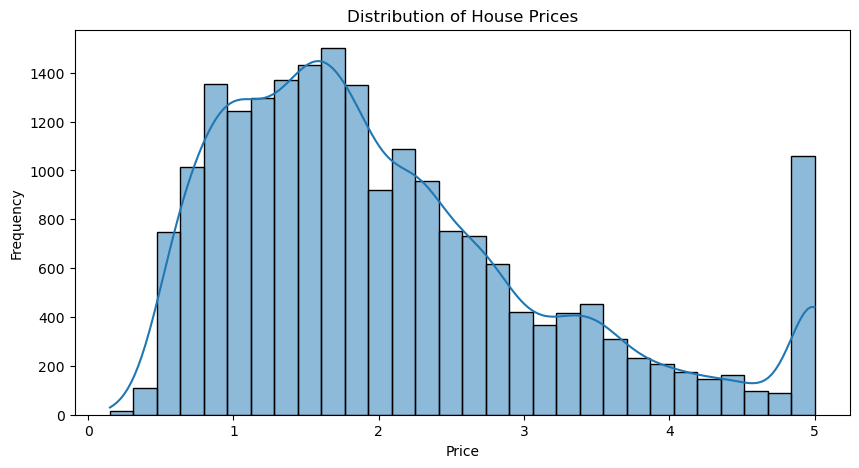

In [8]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

##### <font color='magenta'>4.Explore Variables with Graphs     </font>

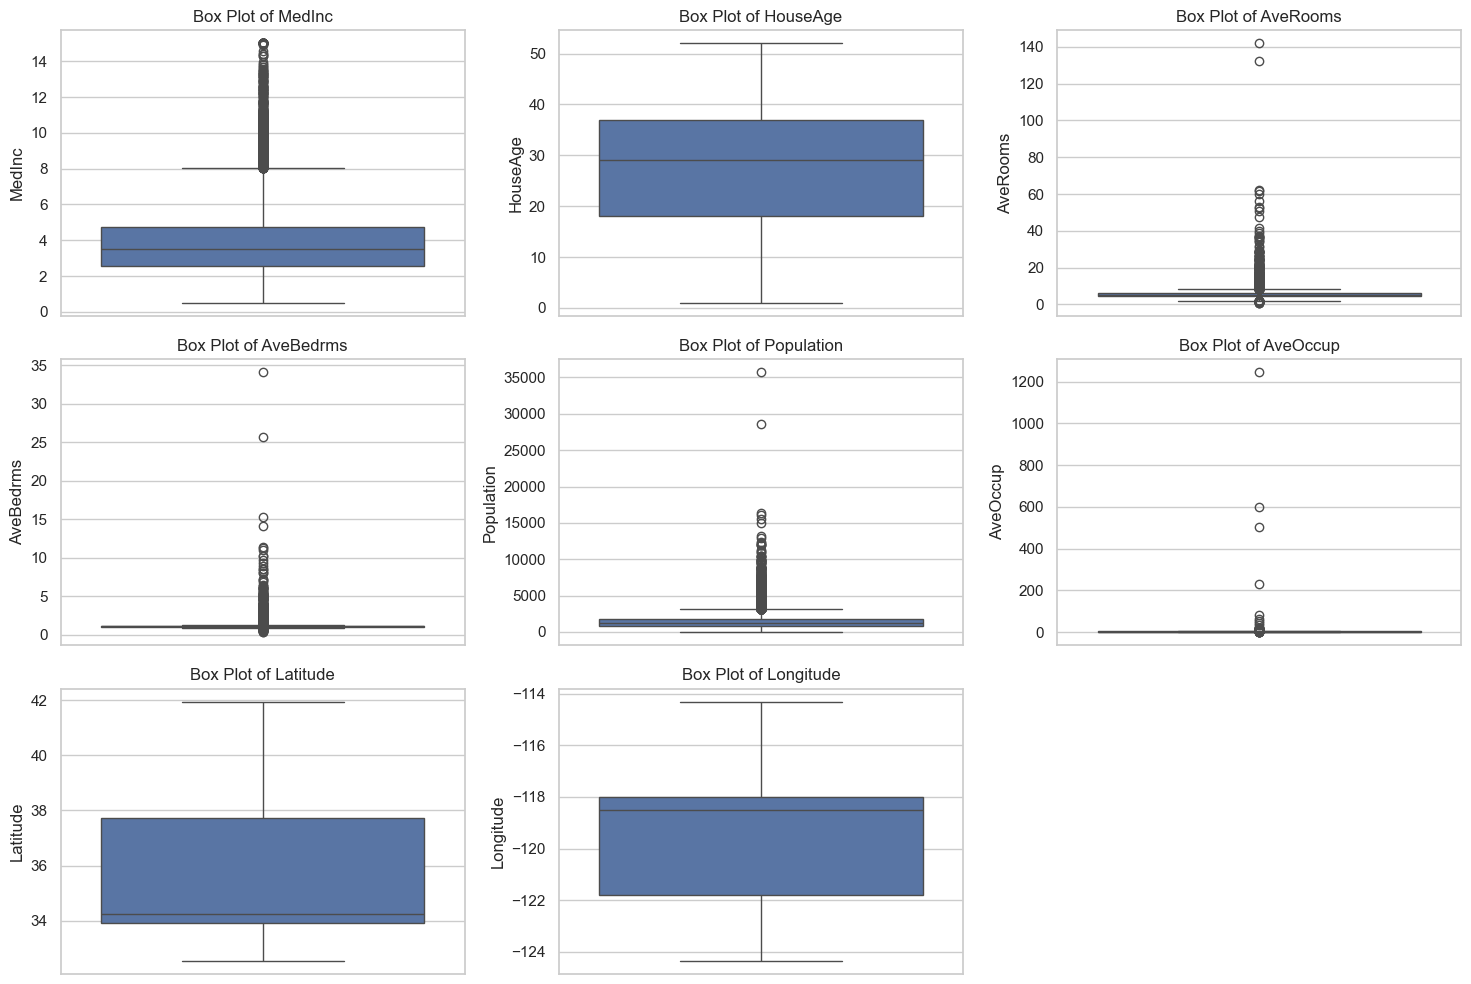

In [9]:
# Set the style for the plots
sns.set(style="whitegrid")

# Creating box plots for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

### <font color='magenta'>     </font>

### <font color='magenta'>     </font>

### <font color='black'>  **Pair Plots to Explore Relationships**   </font>

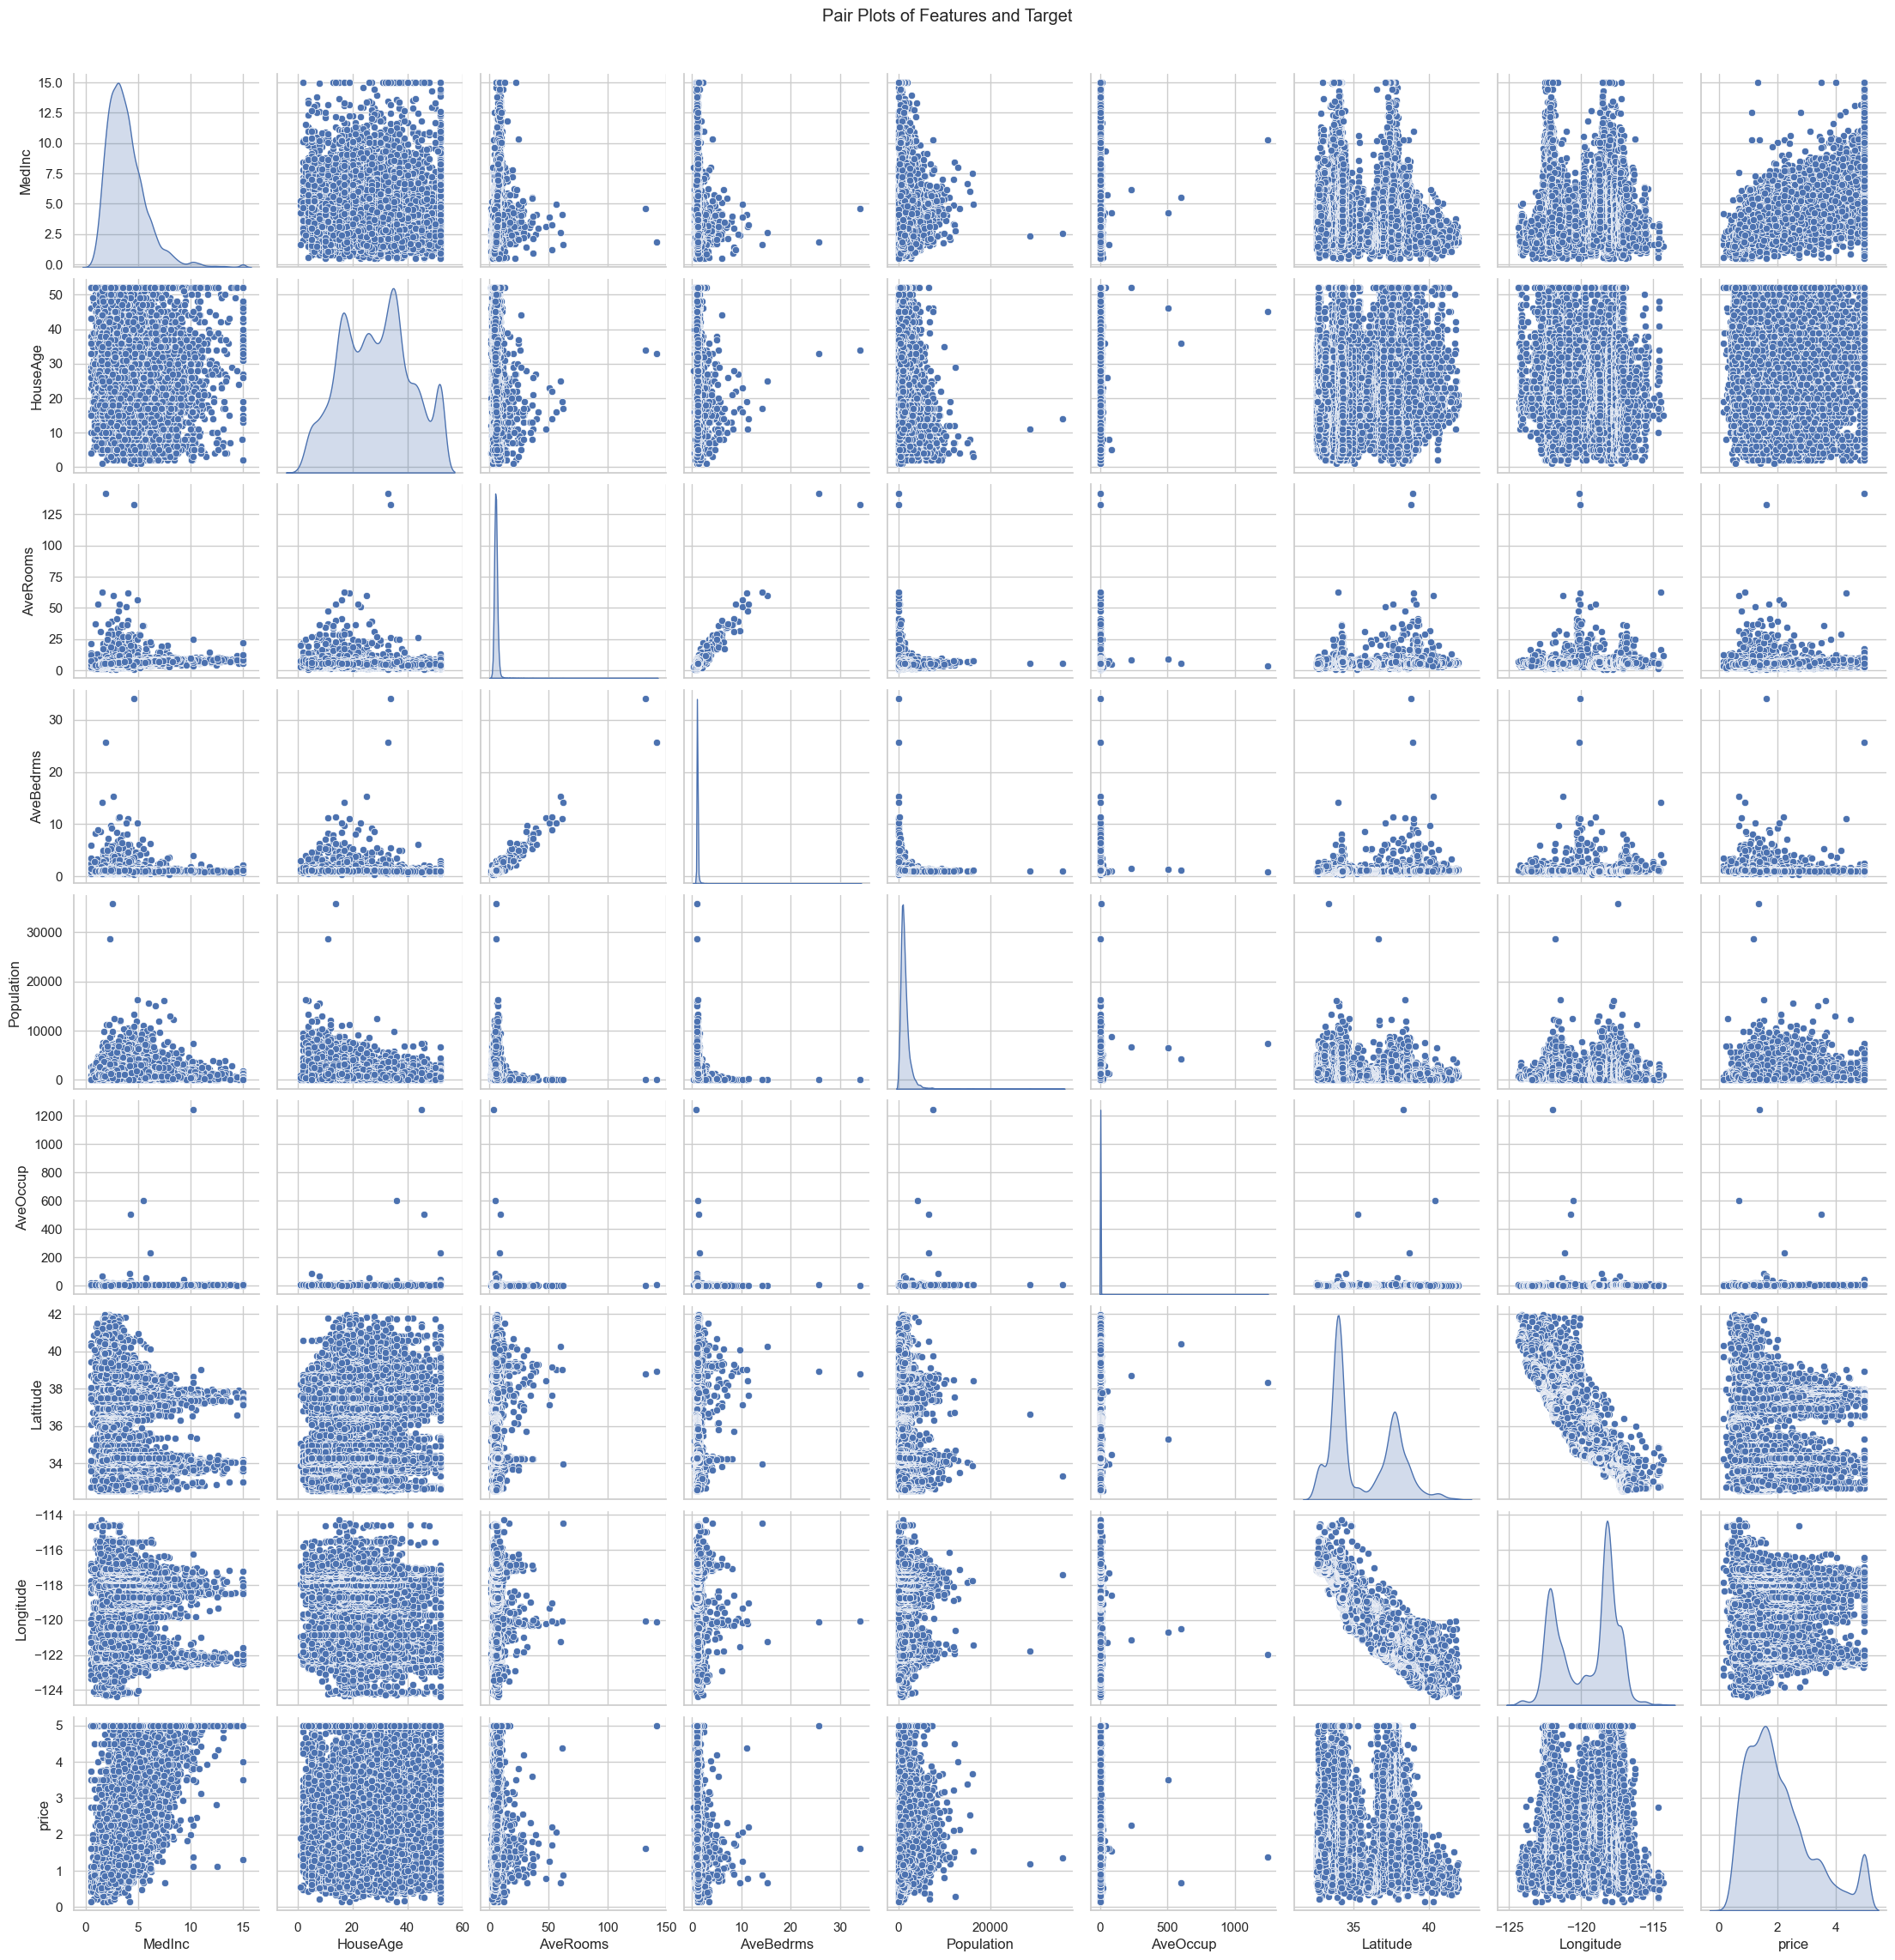

In [10]:
# Pair plots to explore relationships between variables and the target
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plots of Features and Target', y=1.02)
plt.show()

### <font color='magenta'>     </font>

### <font color='magenta'>     </font>

### <font color='black'>Correlation heatmap     </font>

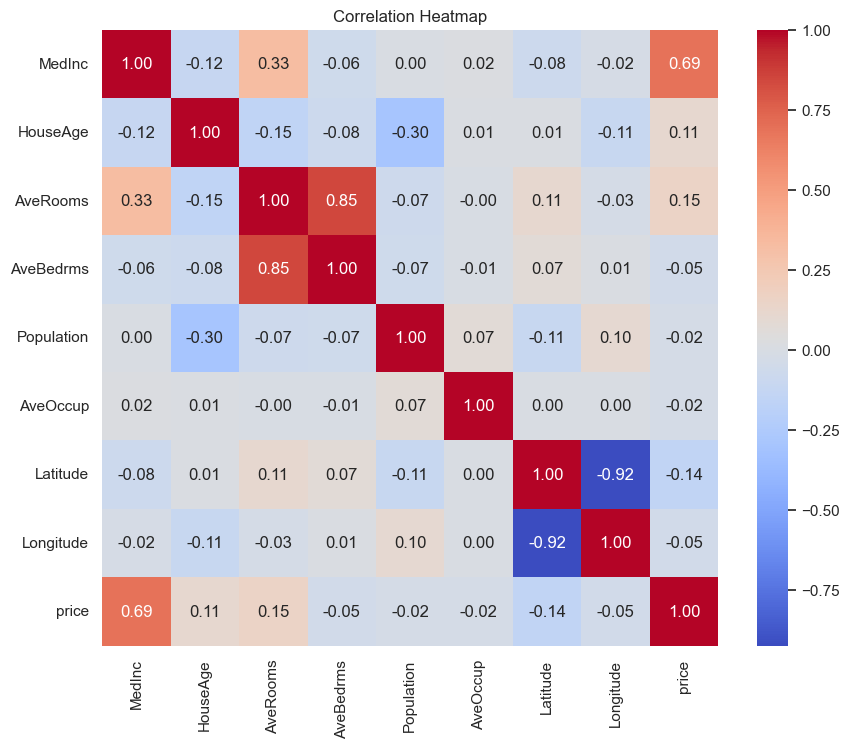

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

### <font color='magenta'>     </font>

### <font color='magenta'>     </font>

##### <font color='magenta'>5. Split Data into Training and Test Sets    </font>

In [12]:
#Split data into separate training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <font color='magenta'>     </font>

##### <font color='magenta'> 6.Feature Scaling     </font>

In [13]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### <font color='magenta'>     </font>

##### <font color='magenta'>7. Model Building    </font>

In [14]:
# Model Building
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

### <font color='magenta'>     </font>

##### <font color='magenta'>8.Predicting    </font>

In [15]:
# Predicting
y_pred = model.predict(X_test_scaled)

### <font color='magenta'>     </font>

##### <font color='magenta'>9.Checking Accuracy Score    </font>

In [16]:
# Checking accuracy score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.29
R-squared: 0.78


### <font color='magenta'>     </font>

### <font color='magenta'>     </font>

##### <font color='magenta'>10.User input for new prediction   </font>

In [ ]:
# User input for new prediction
MedInc = float(input("Enter Median Income (MedInc): "))
HouseAge = float(input("Enter House Age: "))
AveRooms = float(input("Enter Average Rooms: "))
AveBedrms = float(input("Enter AveBedrms: "))
Population = float(input("Enter Population: "))
AveOccup = float(input("Enter Average Occupants: "))
Latitude = float(input("Enter Latitude: "))
Longitude = float(input("Enter Longitude: "))

# Prepare new input features as a DataFrame
new_data = pd.DataFrame({
    'MedInc': [MedInc],          # ---------> Ex values                    # 3.870
    'HouseAge': [HouseAge],                                                # 28.639
    'AveRooms': [AveRooms],                                                # 5.429
    'AveBedrms': [AveBedrms],                                              # 1.096  
    'Population': [Population],                                            # 1425.639  
    'AveOccup': [AveOccup],                                                # 3.070
    'Latitude': [Latitude],                                                # 35.631
    'Longitude': [Longitude]                                               # -119.569
})

# Scale new input features
new_data_scaled = scaler.transform(new_data)

# Make prediction for the new input
y_new_pred = model.predict(new_data_scaled).round(2)

# Format the output to include a dollar sign and scale appropriately
predicted_price = f"${y_new_pred[0] * 100000:.2f}"
print("Predication Price is:", predicted_price)

### <font color='magenta'> </font>

**Conclusion**

- For all above new input features **Predication House Price was** :-  $135000.00 (One Lakh Thirty Five Thousand Ruppes)

### <font color='magenta'> </font>

### <font color='magenta'> </font>

### <font color='magenta'> </font>

# <font color='red'>END.</font>